In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the training data
data = pd.read_parquet('train.parquet')

In [3]:
# Filter data for patients who have taken the "Target Drug" at least once
target_drug_data = data[data['Incident'] == 'TARGET DRUG']

In [4]:
# Create a feature matrix with patient prescriptions in each month
target_drug_data['Month'] = target_drug_data['Date'].dt.to_period('M')
feature_matrix = target_drug_data.pivot_table(index='Patient-Uid', columns='Month', values='Incident', aggfunc='size', fill_value=0)

C:\Users\Ram\AppData\Local\Temp\ipykernel_20392\911238818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_drug_data['Month'] = target_drug_data['Date'].dt.to_period('M')


C:\Users\Ram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

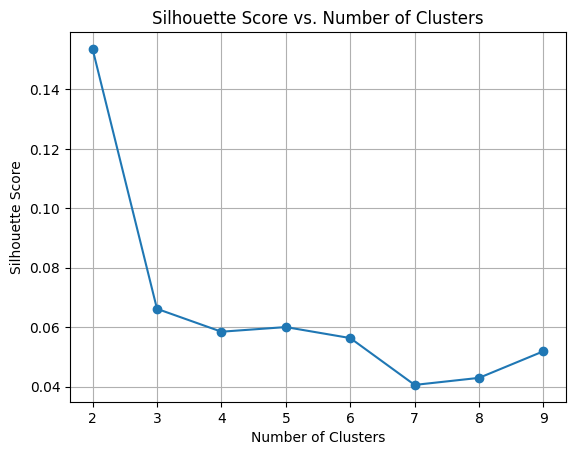

In [5]:
# Apply K-means clustering to identify prescription patterns
n_clusters = range(2, 10)  # Try different number of clusters
cluster_scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(feature_matrix)
    cluster_score = silhouette_score(feature_matrix, cluster_labels)
    cluster_scores.append(cluster_score)

# Determine the optimal number of clusters using the elbow method
plt.plot(n_clusters, cluster_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.xticks(n_clusters)
plt.show()